# This code contains every image generated for Chapters 2 to 4 of the project (except the cubical complex example, which was designed with an image editing program). The images of Chapter 5 are in the "classification" notebook. This code will not work completely without the full dataset, nnUNet segmentation masks and topological descriptors lists, so it requires a correct running of the "image_processing_and_tda" notebook with trial_flag=False. 

In [39]:
import nibabel as nib
import gudhi
from gudhi import CubicalComplex
import matplotlib.pyplot as plt
import os
import json

In [6]:
visualization_dir="Visualization"
if not os.path.exists(visualization_dir):
    os.mkdir(visualization_dir)

In [15]:
def plot_slice(path,save_name):
    img = nib.load(path)
    img_data = img.get_fdata()

    slice_data = img_data[:, :, img_data.shape[2]//4] #We chose this slice because the different frames and masks are easily distinguishable

    plt.figure(figsize=(6, 6))
    plt.imshow(slice_data, cmap='gray', origin='upper')
    plt.axis('off')
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()

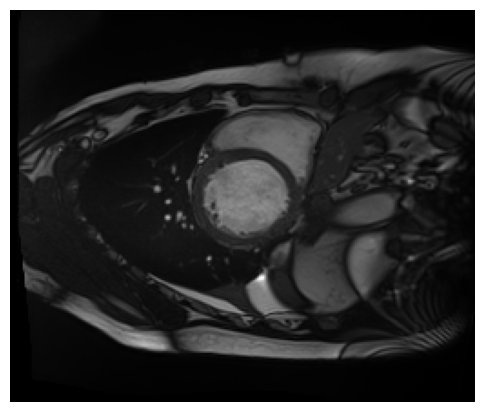

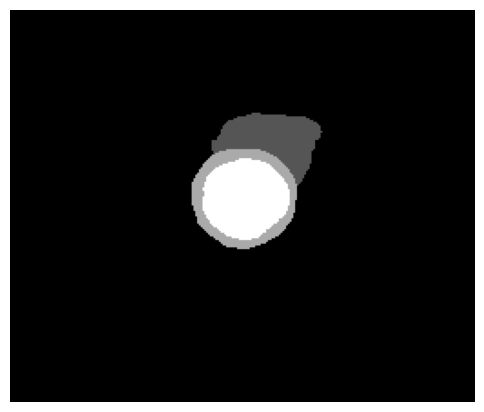

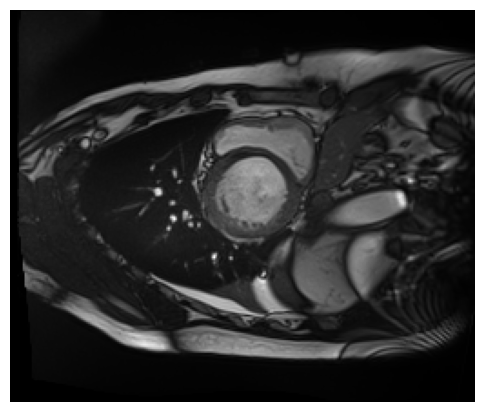

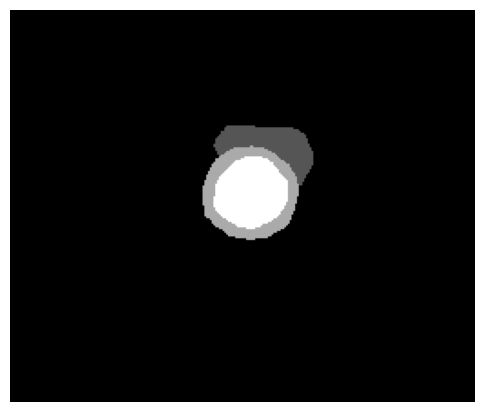

In [29]:
# End-diastole and end-systole frames and segmenation masks of a patient
plot_slice("ACDC/ACDC/database/training/patient001/patient001_frame01.nii.gz",visualization_dir+"/patient001frame01.jpg")
plot_slice("ACDC/ACDC/database/training/patient001/patient001_frame01_gt.nii.gz",visualization_dir+"/patient001frame01mask.jpg")
plot_slice("ACDC/ACDC/database/training/patient001/patient001_frame12.nii.gz",visualization_dir+"/patient001frame12.jpg")
plot_slice("ACDC/ACDC/database/training/patient001/patient001_frame12_gt.nii.gz",visualization_dir+"/patient001frame12mask.jpg")

In [21]:
def plot_images(images, save_name, cols=4):
    num_images = len(images)
    rows = (num_images // cols) + (1 if num_images % cols else 0)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()
    
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off') 
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.savefig(save_name)
    plt.show()

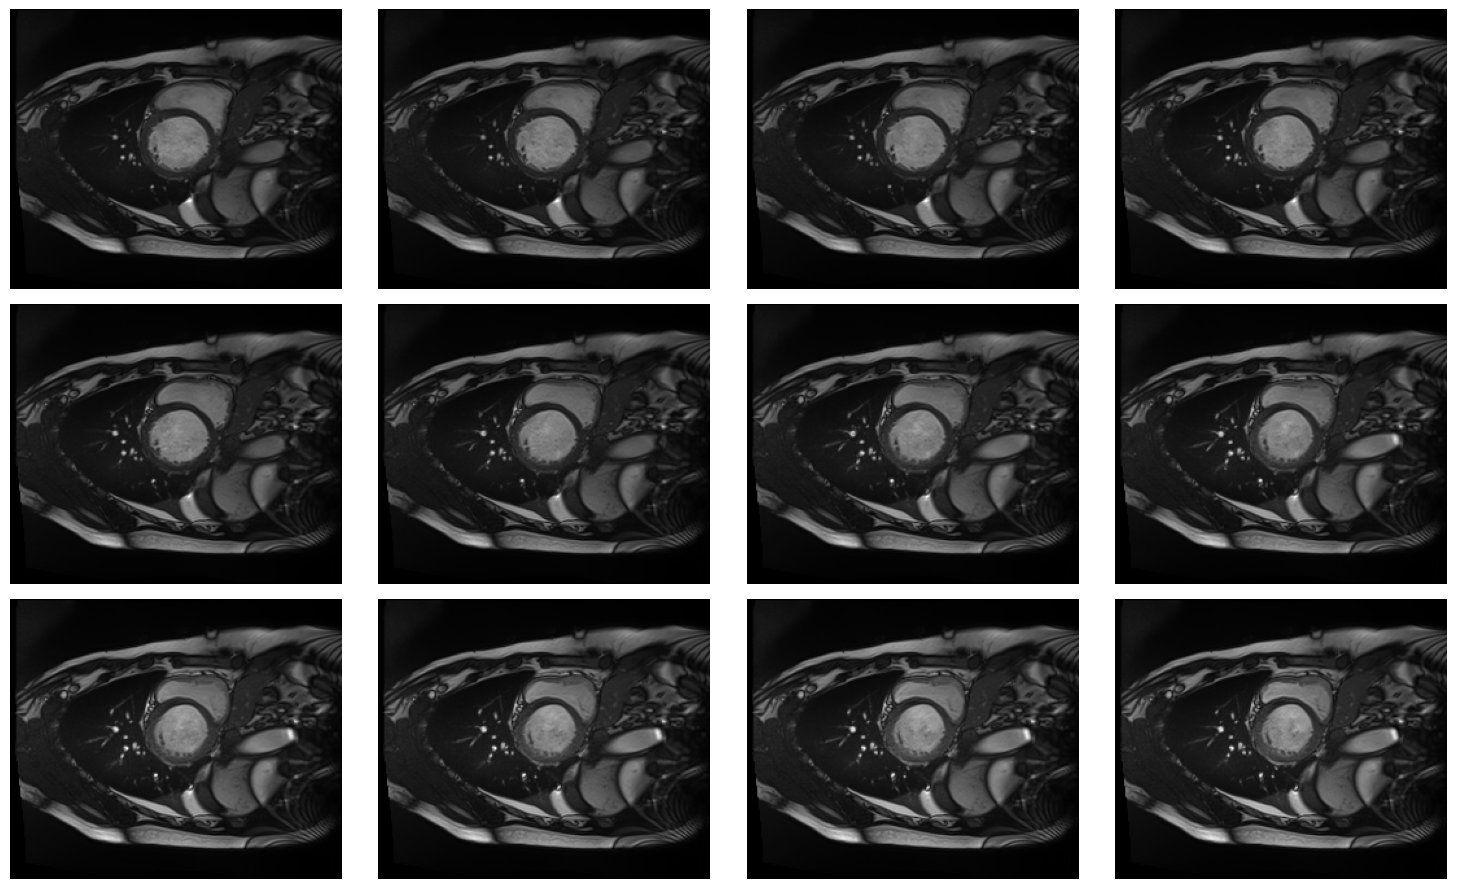

In [28]:
# Frames of the whole cycle for the same patient as above
image_list=[]
base_path="3DImagesPreFilter/"
i=0

for path in os.listdir(base_path):

    img = nib.load(base_path+path)
    img_data = img.get_fdata()
    
    image_list.append(img_data[:,:,img_data.shape[2] // 4])
    
    i=i+1
    if (i>=12): # The first patient's cycle is 12 frames long
        break

plot_images(image_list, visualization_dir+"/patient001fullcycle.jpg")

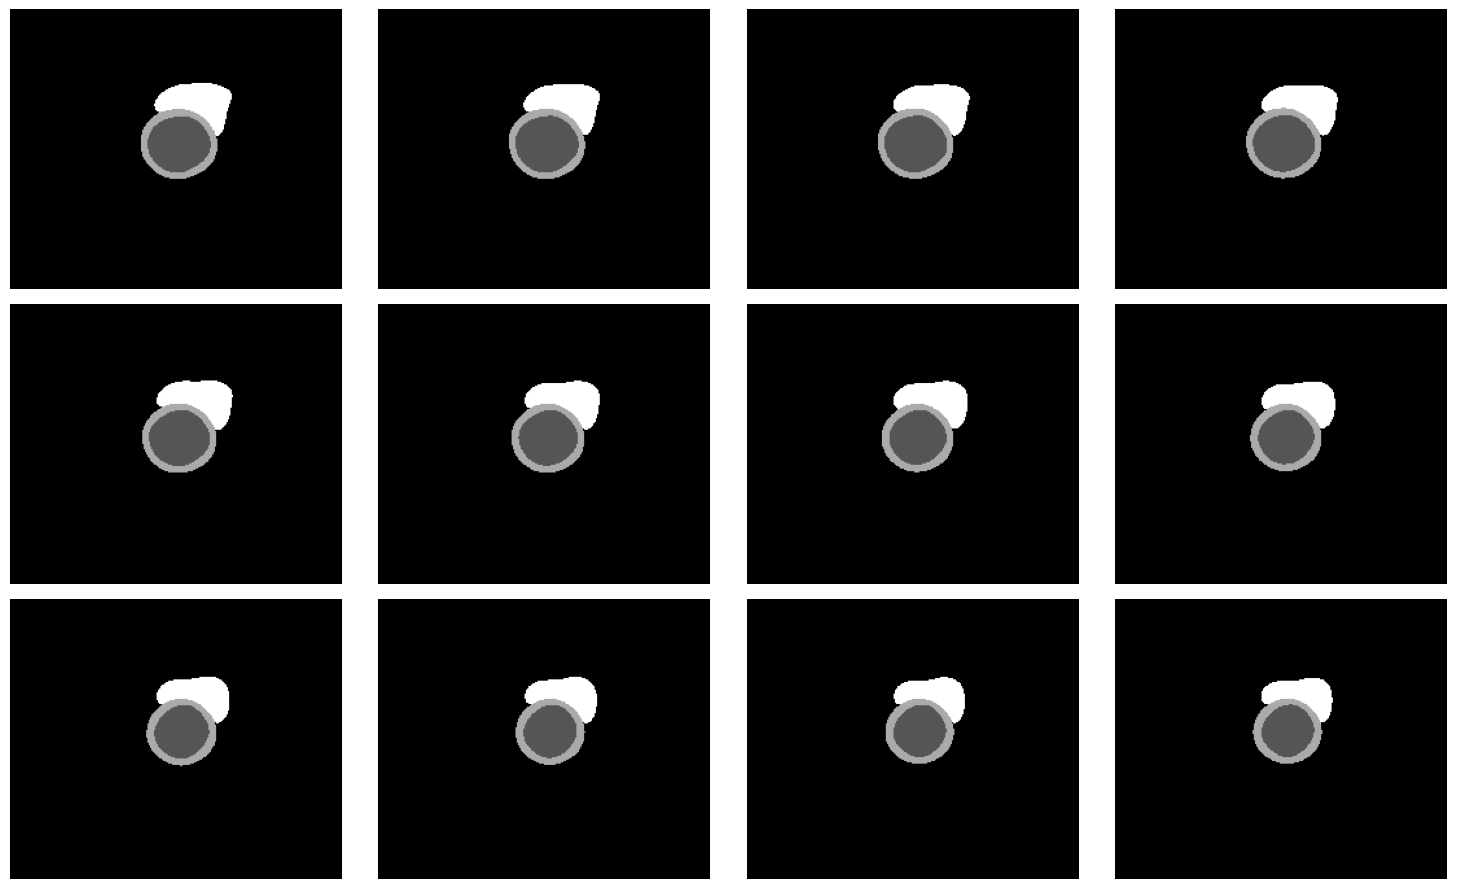

In [32]:
#nnUNet Segmentation masks for the frames above
image_list=[]
base_path="nnUNet/output/"
files = sorted([f for f in os.listdir(base_path) if f.endswith(".nii.gz")]) #Necessary because nnUNet outputs more things apart from .nii.gz files
i=0

for file in files:

    img = nib.load(base_path+file)
    img_data = img.get_fdata()
    
    image_list.append(img_data[:,:,img_data.shape[2] // 4])
    
    i=i+1
    if (i>=12): # The first patient's cycle is 12 frames long
        break

plot_images(image_list, visualization_dir+"/patient001nnunetmasks.jpg")

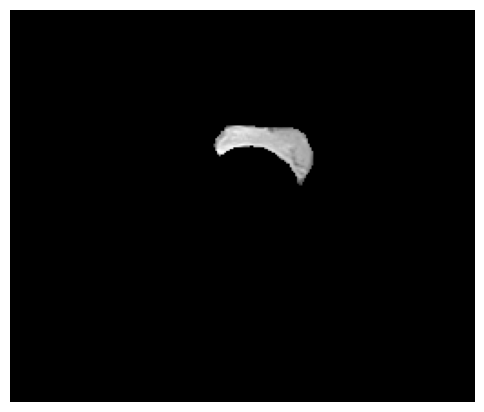

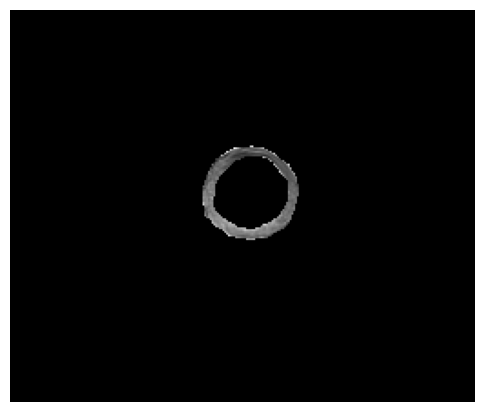

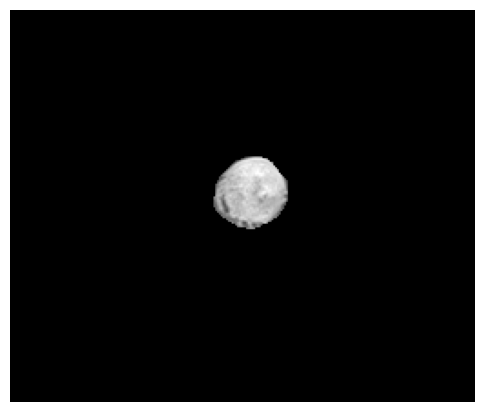

In [33]:
#Application of the segmentation mask
plot_slice("ROUSEG/Right/00112.nii.gz",visualization_dir+"/patient001frame12RightVentricle.jpg")
plot_slice("ROUSEG/Myoca/00112.nii.gz",visualization_dir+"/patient001frame12Myocardium.jpg")
plot_slice("ROUSEG/Left/00112.nii.gz",visualization_dir+"/patient001frame12LeftVentricle.jpg")

In [1]:
def plot_diagram(path,save_name,title):

    img = nib.load(path)
    img_data = img.get_fdata()
            
    cubical_complex = CubicalComplex(top_dimensional_cells=img_data)
    persistence_diagram=cubical_complex.persistence()
    
    gudhi.plot_persistence_diagram(persistence_diagram)
    plt.title(title)
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()

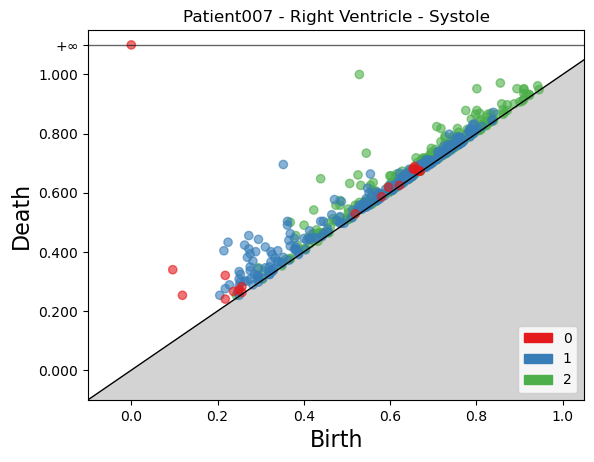

In [36]:
# Diagram of a certain patient with a lot of points in it
plot_diagram("ROUSEG/Right/00707.nii.gz", visualization_dir+"/Systole007RightPD.jpg","Patient007 - Right Ventricle - Systole")

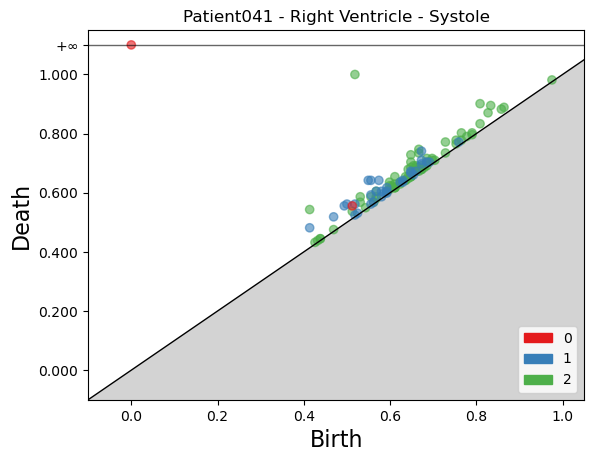

In [35]:
# Diagram of another patient with few points in it
plot_diagram("ROUSEG/Right/04111.nii.gz", visualization_dir+"/Systole041RightPD.jpg","Patient041 - Right Ventricle - Systole")

In [54]:
# Load some lists for visualization

with open("Lists/R_e1_ROUSEG.json", "r") as f:
    R_e1_ROUSEG=json.load(f)

with open("Lists/L_e1_NETSEG.json", "r") as f:
    L_e1_NETSEG=json.load(f)

with open("Lists/L_e1_ROUSEG.json", "r") as f:
    L_e1_ROUSEG=json.load(f)

In [57]:
def plot_time_series(list1, list2, list3, list4, list5,save_name):

    lists = [list1, list2, list3, list4, list5]
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(lists):
        plt.plot(range(1, len(data) + 1), data, color=colors[i], label=f'List {i+1}', marker='o')

    plt.xlabel("Frame")
    plt.ylabel("Entropy value")
    plt.legend(["DCM","HCM","MINF","NOR","RV"])
    plt.savefig(save_name)
    plt.grid()
    
    plt.show()

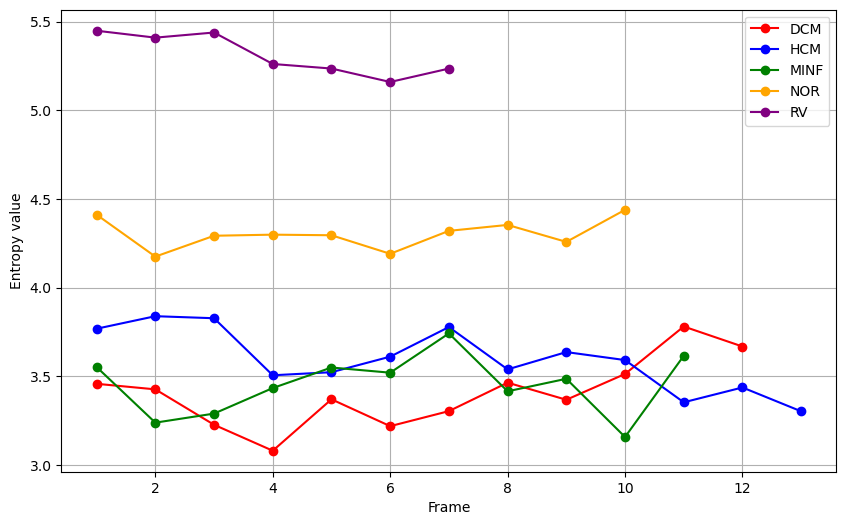

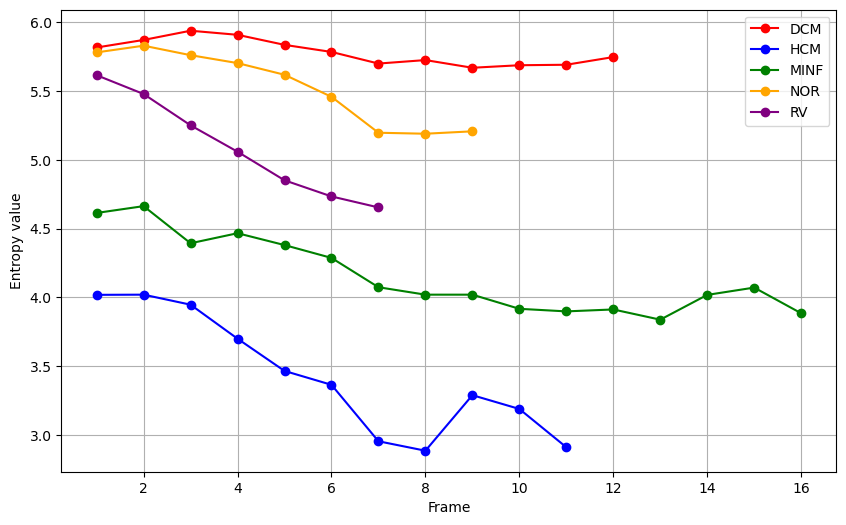

In [58]:
plot_time_series(R_e1_ROUSEG[0],R_e1_ROUSEG[20],R_e1_ROUSEG[40],R_e1_ROUSEG[60],R_e1_ROUSEG[80],visualization_dir+"/R_e1_selected_ts.jpg")
plot_time_series(L_e1_NETSEG[1],L_e1_NETSEG[21],L_e1_NETSEG[41],L_e1_NETSEG[61],L_e1_NETSEG[81],visualization_dir+"/L_e1_selected_ts.jpg")